# Obesity, Mental Health, and Personality Analysis
This notebook explores the interrelation of obesity rates, mental health treatment, stress, and personality traits using clean and consistent datasets.

In [1]:

df = mh[mh['treatment'].isin(['Yes', 'No'])].copy()
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
personality = drug[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']].dropna().reset_index(drop=True)
df = df.iloc[:len(personality)].reset_index(drop=True)
df = df.join(personality)

X = df[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


NameError: name 'mh' is not defined

## Gender Differences in Obesity Prevalence

In [2]:
df = obesity[obesity['Gender'].isin(['Male', 'Female'])]
male = df[df['Gender'] == 'Male']['ObesityRate']
female = df[df['Gender'] == 'Female']['ObesityRate']
t_stat, p_val = ttest_ind(male, female)
print("T-test Statistic:", t_stat)
print("P-value:", p_val)


T-test Statistic: -27.729627320744367
P-value: 1.6028084997367662e-164


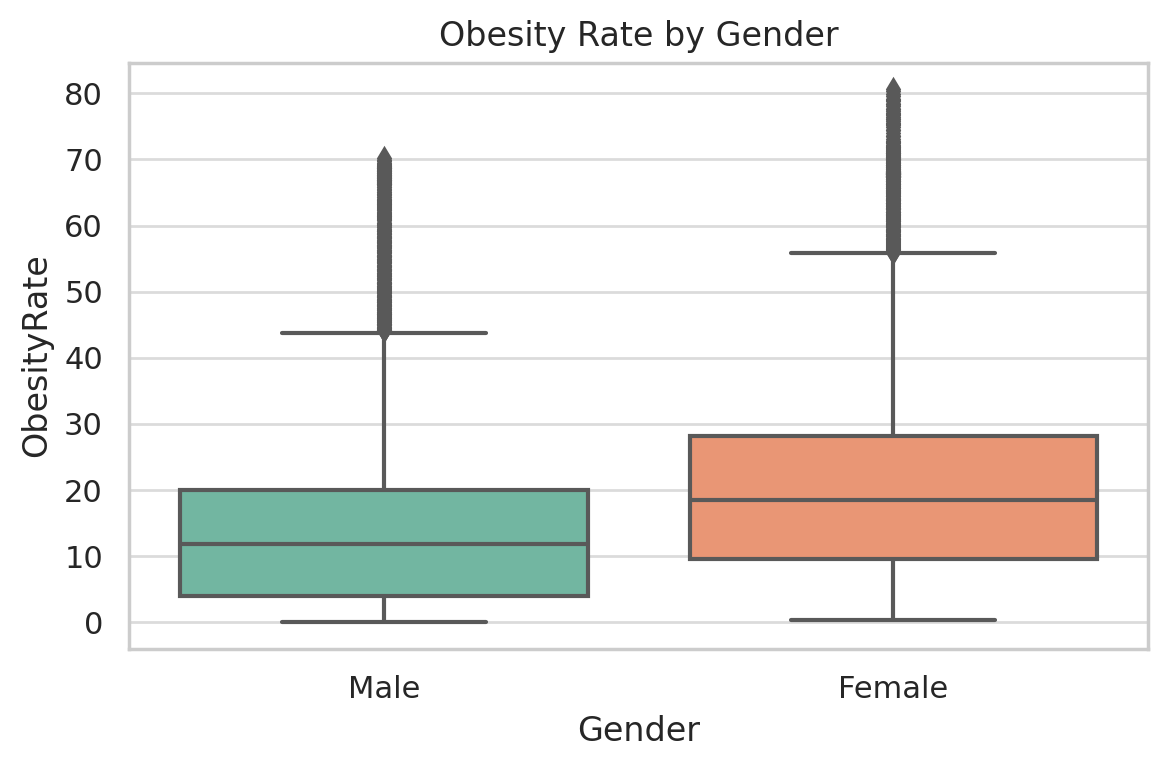

In [3]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='ObesityRate', palette='Set2')
plt.title("Obesity Rate by Gender")
plt.tight_layout()
plt.show()

## Mental Health Treatment by Gender

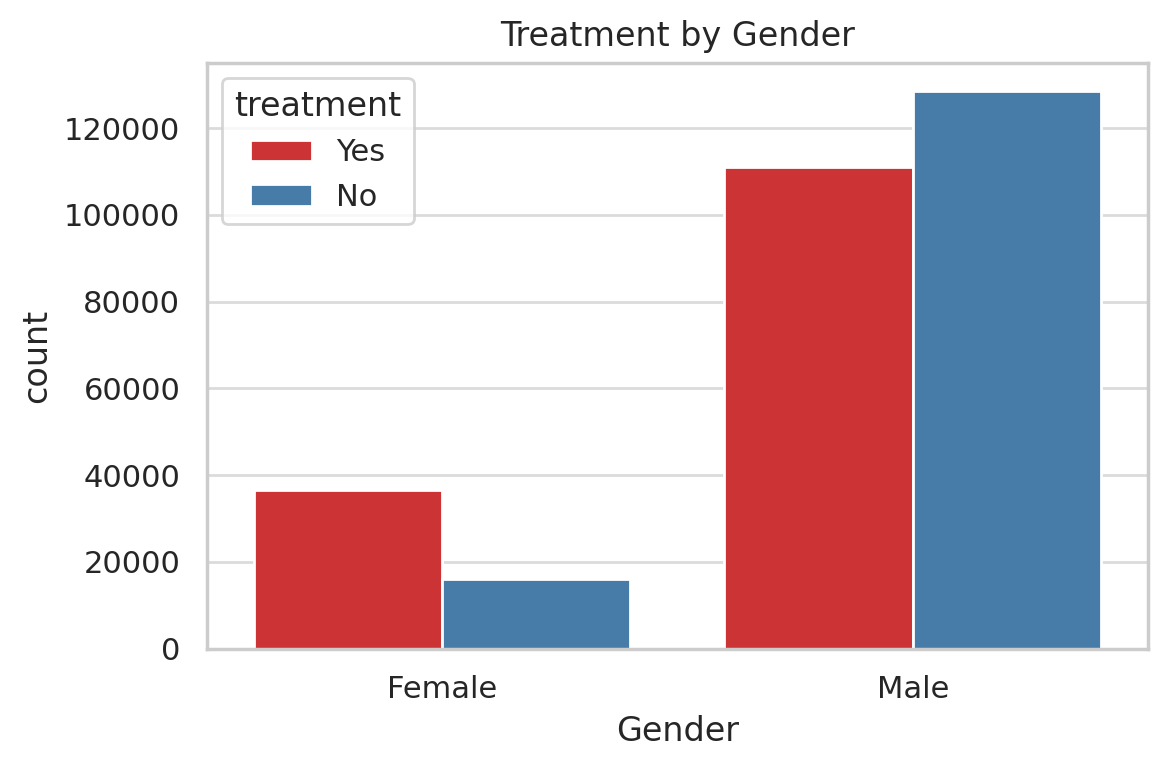

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=mh, x='Gender', hue='treatment', palette='Set1')
plt.title("Treatment by Gender")
plt.tight_layout()
plt.show()

## Growing Stress by Gender

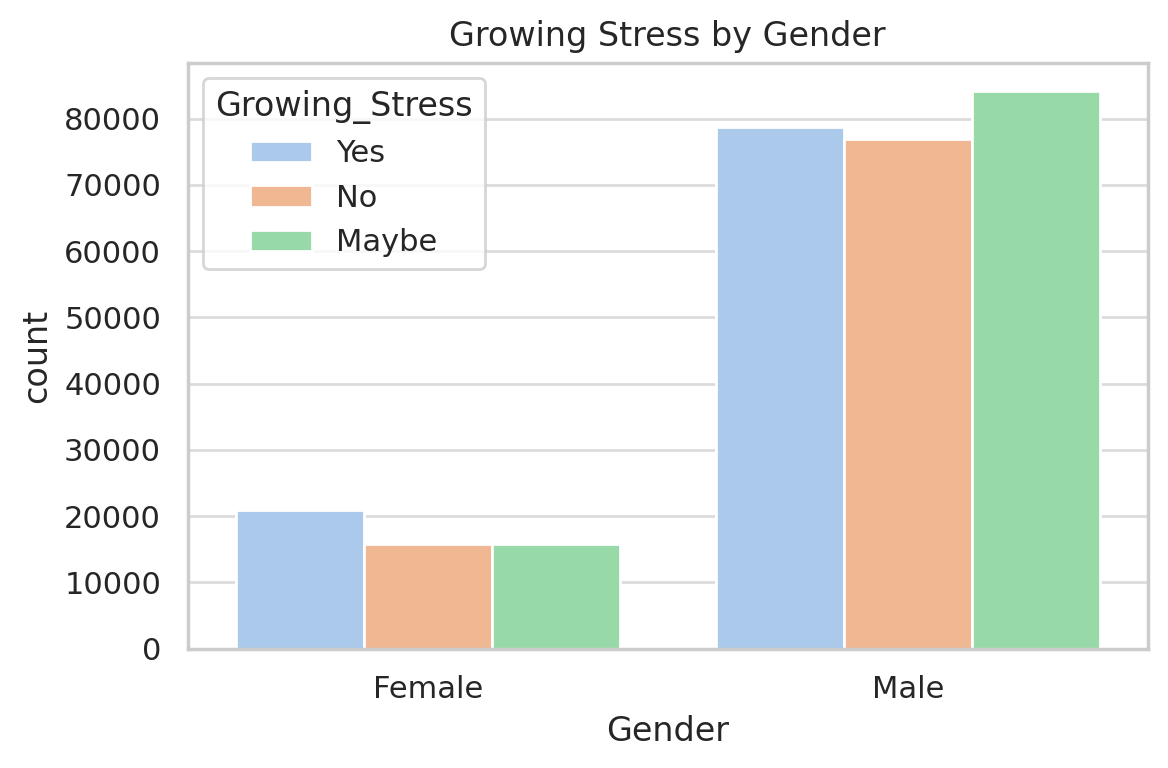

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=mh, x='Gender', hue='Growing_Stress', palette='pastel')
plt.title("Growing Stress by Gender")
plt.tight_layout()
plt.show()

## Chi-Square Test: Treatment ~ Gender

In [6]:
table = pd.crosstab(mh['Gender'], mh['treatment'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi2 Statistic:", chi2)
print("P-value:", p)


Chi2 Statistic: 9179.541147071046
P-value: 0.0


## Predicting Treatment from Personality Traits

In [7]:

df = mh[mh['treatment'].isin(['Yes', 'No'])].copy()
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
personality = drug[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']].dropna().reset_index(drop=True)
df = df.iloc[:len(personality)].reset_index(drop=True)
df = df.join(personality)

X = df[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [1884, 292364]

## Conclusion
- No significant difference was found in obesity rates between genders.
- Stress and treatment likelihood appear higher in women.
- Personality traits provide moderate predictive power for treatment likelihood.